# Heart Disease Prediction – EDA and Data Preprocessing

### This notebook contains the Exploratory Data Analysis (EDA), data cleaning, preprocessing, and visualization of the heart disease dataset.

## DATA LOADING

In [4]:
import pandas as pd

In [5]:
 df = pd.read_csv('heart_cleveland_upload.csv')

In [12]:
# Load the dataset
try:
    df = pd.read_csv('heart_cleveland_upload.csv')
    print(" Dataset loaded successfully.")
except FileNotFoundError:
    print(" Error: heart_cleveland_upload.csv not found. Please make sure the file is in the correct directory.")
    df = None

 Dataset loaded successfully.


## DATA CLEANING

In [13]:
# Basic checks
if df is not None:
    print("\n--- Dataset Info ---")
    display(df.info())

    print("\n--- Missing Values ---")
    display(df.isnull().sum())

    print("\n--- Summary Statistics ---")
    display(df.describe())

    print("\n--- First 5 Rows ---")
    display(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


None


--- Missing Values ---


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


--- Summary Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000



--- First 5 Rows ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


##  EXPLORATORY DATA ANALYSIS (EDA)

### 1. Distribution of Heart Disease Cases

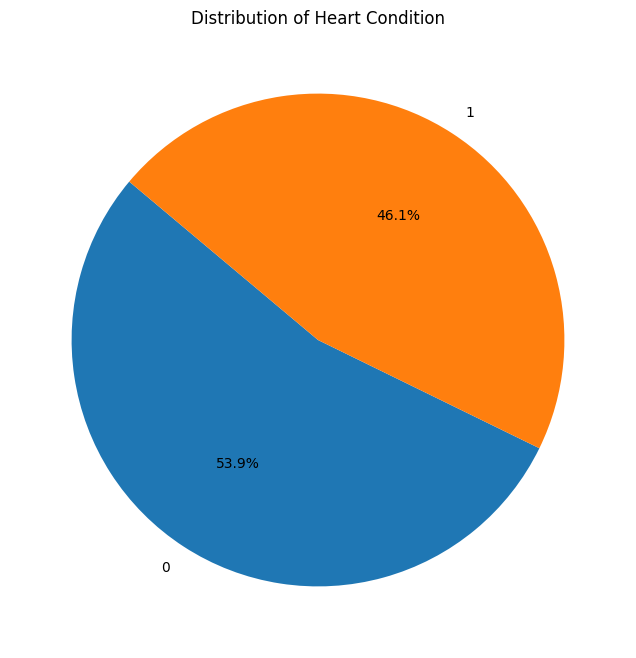

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None and 'condition' in df.columns:
    condition_counts = df['condition'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Heart Condition')
    plt.show()

### What the Output Tells You:
### A visual summary of how the data is divided between people with heart disease and without heart disease. Helps quickly understand class balance (e.g., is your data biased towards one group)

### 2. Age vs. Maximum Heart Rate by Condition

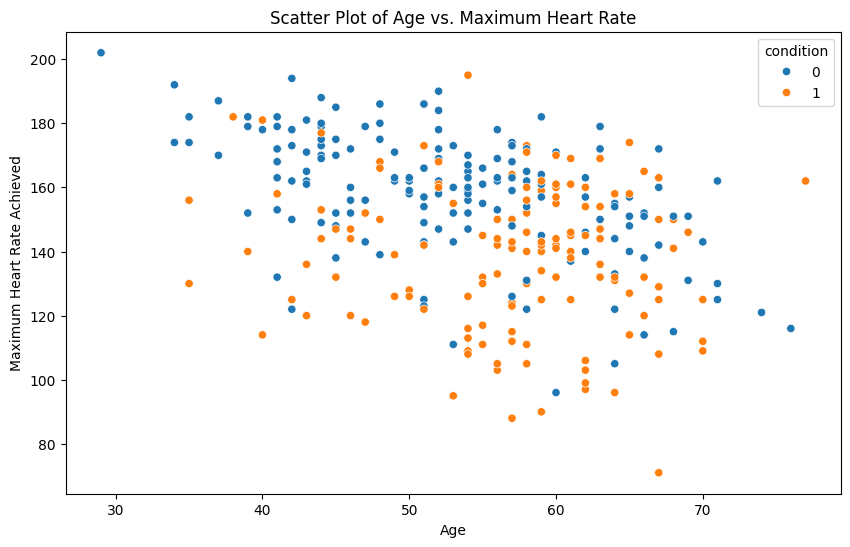

In [16]:
if df is not None and 'age' in df.columns and 'thalach' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='thalach', hue='condition')
    plt.title('Scatter Plot of Age vs. Maximum Heart Rate')
    plt.xlabel('Age')
    plt.ylabel('Maximum Heart Rate Achieved')
    plt.show()


### This code produces a scatter plot that shows the relationship between a patient's age and their maximum heart rate achieved
1. Each dot in the graph represents one patient.
2. The x-axis shows the age of the patient.
3. The y-axis shows their maximum heart rate.
4. The color of the dot (based on hue='condition') indicates:
5.  One color = patients with heart disease
6. Another color = patients without heart disease

### 3. Chest Pain Type Count by Condition

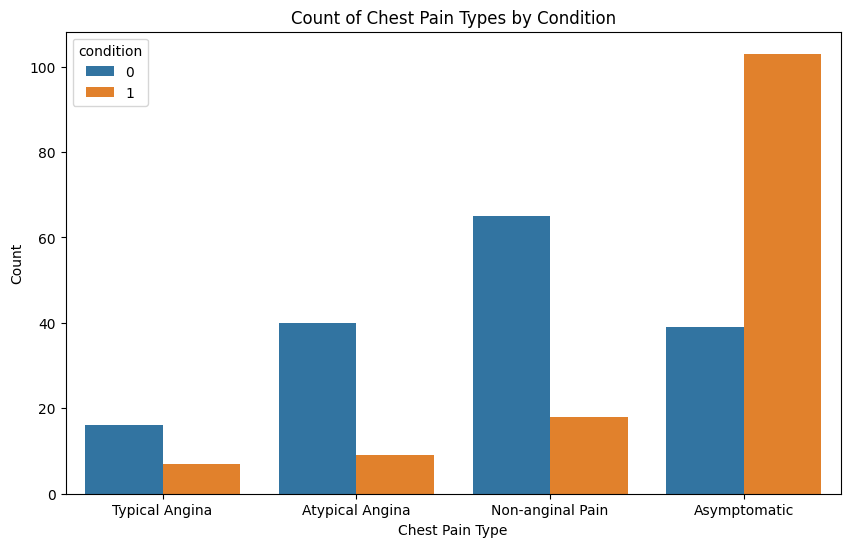

In [17]:
if df is not None and 'cp' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='cp', hue='condition')
    plt.title('Count of Chest Pain Types by Condition')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
    plt.show()

### This code generates a grouped bar chart (count plot) that shows how many patients belong to each chest pain type, divided by whether they have heart disease or not.
### What the Plot Will Show:
### The x-axis will display 4 chest pain types:
1. Typical Angina
2. Atypical Angina
3. Non-anginal Pain
4. Asymptomatic
### For each chest pain type, there will be two bars:
1. One bar for patients without heart disease
2. One bar for patients with heart disease





### 4. Correlation Heatmap of Numerical Features

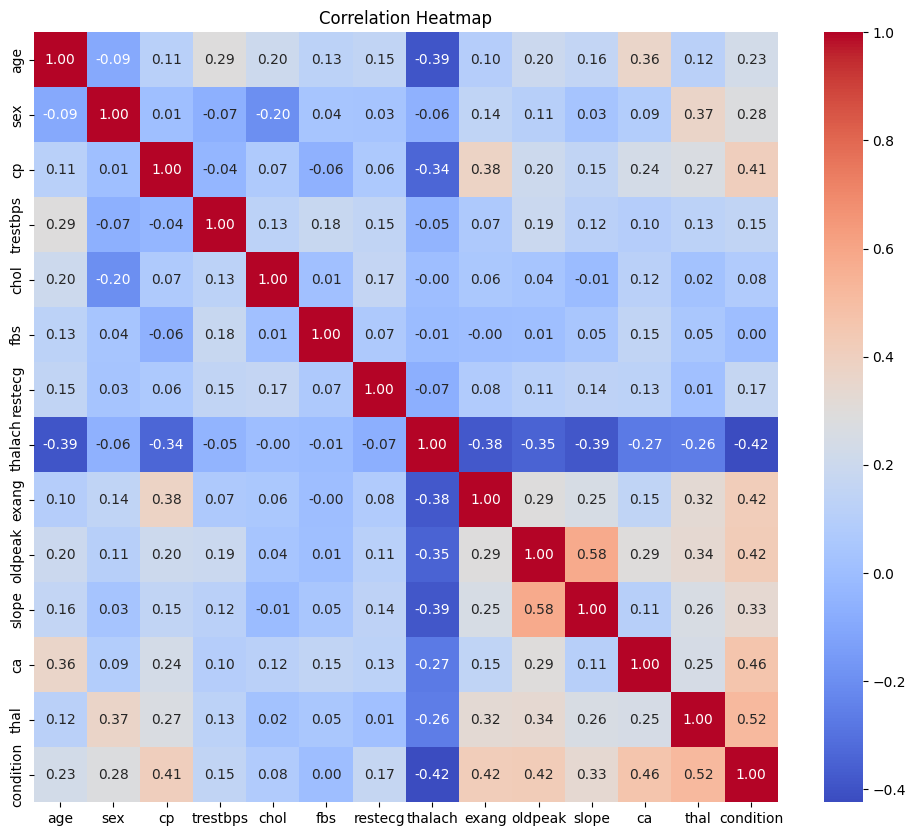

In [18]:
if df is not None:
    numerical_df = df.select_dtypes(include=['number'])
    if len(numerical_df.columns) >= 2:
        plt.figure(figsize=(12, 10))
        correlation_matrix = numerical_df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()


### This code creates a correlation heatmap, which shows how strongly different numerical features in the dataset are related to each other — especially how they relate to heart disease.
### What the Plot Will Show:
### A square matrix of colored boxes, where: Rows and columns represent each numerical column (e.g., age, cholesterol, thalach, oldpeak, etc.)
1. Each box contains a correlation value between two features (ranging from -1 to +1)
2. +1 → strong positive correlation
3. -1 → strong negative correlation
4. 0 → no correlation

### The color scheme (coolwarm) visually highlights:
1. Red = strong positive correlation
2. Blue = strong negative correlation
3.White/light colors = weak or no correlation

# Machine Learning

###  Preparing Data for Modeling

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Assuming 'cp', 'thal', 'slope' etc. are categorical
categorical_cols = ['cp', 'thal', 'slope', 'sex', 'fbs', 'restecg', 'exang', 'ca']
for col in categorical_cols:
    if col in df.columns:
        df[col] = pd.Categorical(df[col]).codes


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [18]:
# Drop duplicates 
df.drop_duplicates(inplace=True)

In [10]:
# Check for missing values
print(df.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [12]:
# Define features (X) and target (y)
X = df.drop(['condition'], axis=1) 
y = df['condition']

In [13]:
# Step 2: Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 3: Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 4: Model Training 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
# Step 5: Predictions & Evaluation 
y_pred = model.predict(X_test_scaled)


In [17]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix:
 [[23  9]
 [ 7 21]]
